## Practicing Supervised Machine Learning Algorithms
### Decision Tree and Naive bayes

### Problem Statement
The data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
- Any patient whose age exceeded 89 is listed as being of age "90".
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)
- Use these patient records to determine which patients have liver disease and which ones do not. Perform the following operations.
    - Analyze the data
        - Find out if there are any attributes with correlation more than 0.50
        - Visualize the attributes using – Kernel density estimation (KDE/Histogram plots) or other relevant plots – Write down your observations
    - Curate the data (if required)
        - Identify the missing values and fill them with an appropriate method, if there are any missing values.
    - Build a disease classifier using Decision Tree (DT) and Naïve Bayes (NB) algorithms.
        - Build the model & Perform 5-fold cross validation
        - Evaluate the model using accuracy, confusion matrix, precision, recall and F1-Scores.
        - Compare the performance of both the models (NB and DT)
    - Store the results into a csv file.

In [2]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [3]:
# Reading the dataset:
df = pd.read_csv("indian_liver_patient.csv")

In [4]:
# Top 5 records:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Shape
df.shape

(583, 11)

In [5]:
# Target data
df["Dataset"].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [6]:
# Statistical Details:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


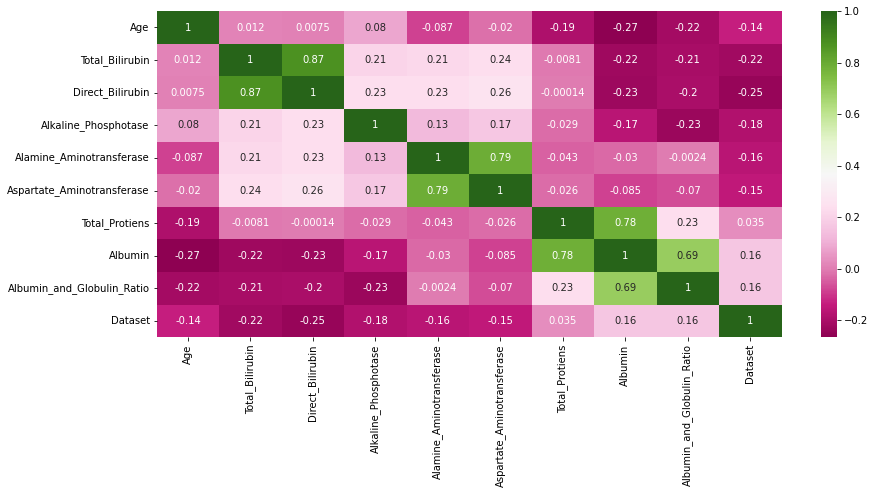

In [7]:
# Correlation using Heatmap:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")
plt.show()

- Total_Bilirubin and Direct_Bilirubin features having **0.87** correlation.
- Aspartate_Aminotransferase and Alamine_Aminotransferase having **0.79** correlation.
- Total_Protiens and Total_Protiens having **0.78** correlation.
- Albumin and Albumin_and_Globulin_Ratio having **0.69** correlation.

### Age

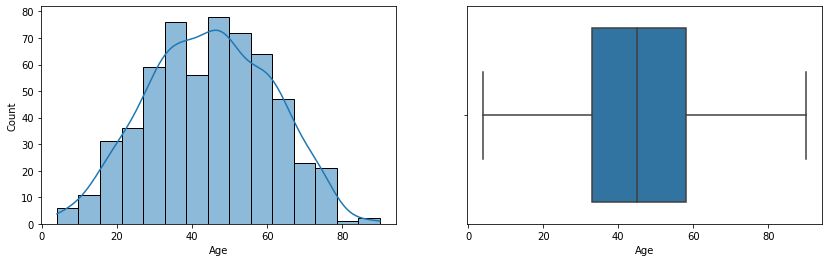

In [8]:
# Age
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Age', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Age')
plt.show()

- Age feature is normally distributed.
- No outliers is present.

### Total_Bilirubin

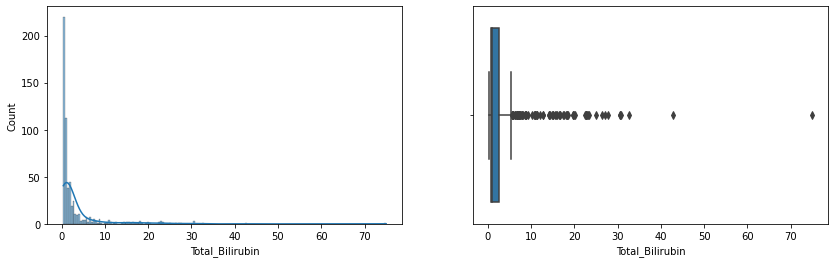

In [9]:
# Total_Bilirubin
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Total_Bilirubin', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Total_Bilirubin')
plt.show()

- Total_Bilirubin feature is Right skewed.
- Outliers is present.

### Direct_Bilirubin

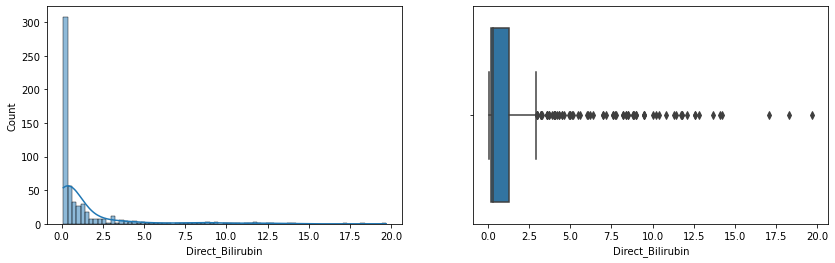

In [10]:
# Direct_Bilirubin
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Direct_Bilirubin', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Direct_Bilirubin')
plt.show()

- Direct_Bilirubin feature is Right skewed.
- Outliers is present.

### Alkaline_Phosphotase

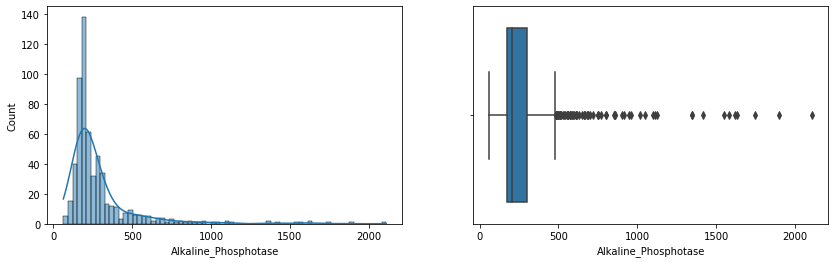

In [11]:
# Alkaline_Phosphotase
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Alkaline_Phosphotase', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Alkaline_Phosphotase')
plt.show()

- Direct_Bilirubin feature is Right skewed.
- Outliers is present.

### Alamine_Aminotransferase

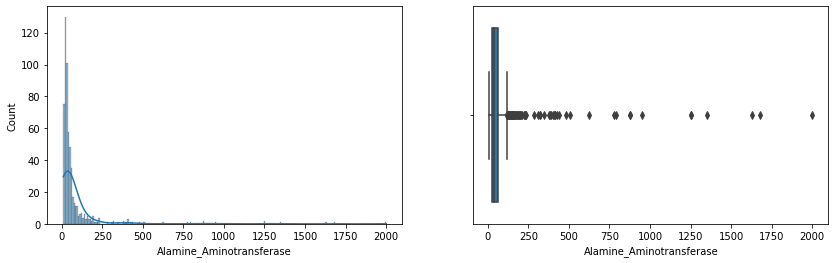

In [12]:
# Alamine_Aminotransferase
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Alamine_Aminotransferase', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Alamine_Aminotransferase')
plt.show()

- Alamine_Aminotransferase feature is Right skewed.
- Outliers is present.

### Aspartate_Aminotransferase

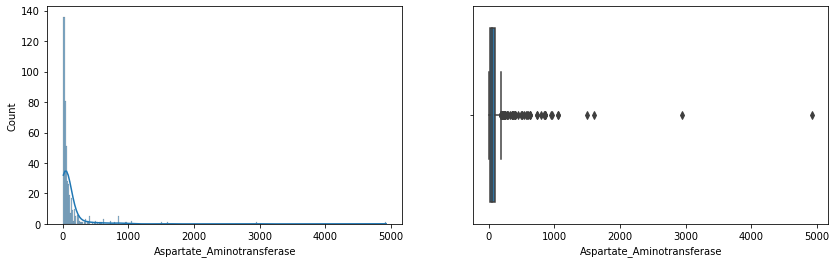

In [13]:
# Aspartate_Aminotransferase
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Aspartate_Aminotransferase', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Aspartate_Aminotransferase')
plt.show()

- Aspartate_Aminotransferase feature is Right skewed.
- Outliers is present.

### Total_Protiens

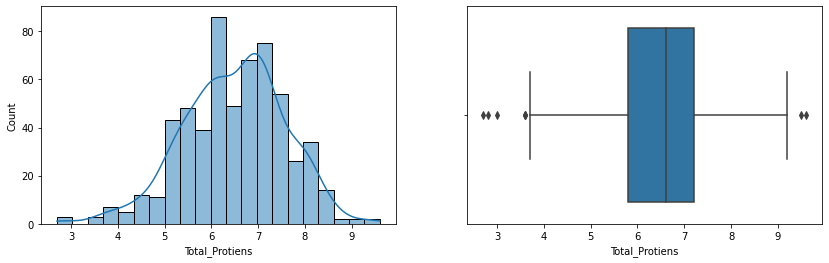

In [14]:
# Total_Protiens
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Total_Protiens', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Total_Protiens')
plt.show()

- Total_Protiens feature slightly follows normal distribution.
- Outliers is present.

### Albumin

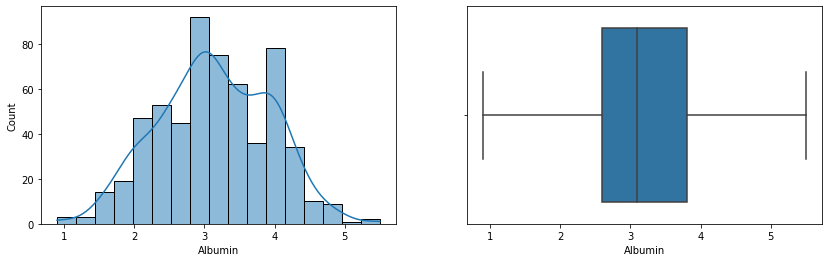

In [15]:
# Albumin
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Albumin', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Albumin')
plt.show()

- Albumin feature follows the normal distribution.
- No outliers is present.

### Albumin_and_Globulin_Ratio

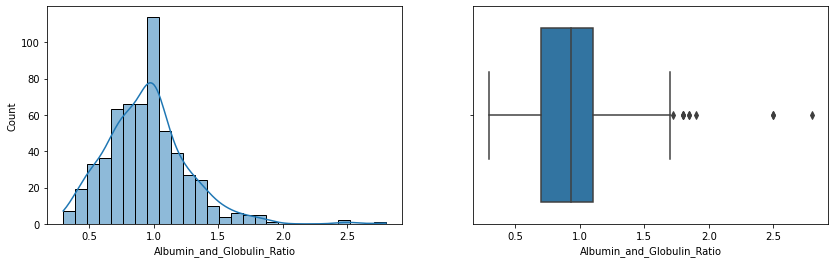

In [16]:
# Albumin_and_Globulin_Ratio
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Albumin_and_Globulin_Ratio', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Albumin_and_Globulin_Ratio')
plt.show()

- Albumin feature is Right skewed.
- No outliers is present.

### Curating the Data

In [37]:
# Finding null values:

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

#### As we can see from the data,

- Albumin_and_Globulin_Ratio has 4 missing values.

In [38]:
# Filling the missing values with Median

df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].median(), inplace=True)

In [40]:
# Checking if there are still any missing values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Converting categorical string columns to numeric

In [45]:
# Following coloumns are to be converted into numeric.

categorical_cols = ['Gender']

In [46]:
# LabelEncoder is used for converting categorical string columns to numeric.

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [47]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [48]:
# Independent and Dependent features:

X = df.iloc[:, :10]
y = df.iloc[:, 10]

In [49]:
# Train-Test Spilt:

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=8)

### Building a disease classifier using Decision Tree (DT)

In [50]:
# DecisionTreeClassifier:

DT = DecisionTreeClassifier(random_state=8)

In [51]:
# k-fold cross validation for Decision Tree:

y_pred_DT_K = cross_val_predict(DT, x_train, y_train, cv=5)

In [59]:
print("Simple Accuracy :", accuracy_score(y_train, y_pred_DT_K)*100)

Simple Accuracy : 66.13272311212815


In [60]:
print("Precision Score :", precision_score(y_train, y_pred_DT_K))

Precision Score : 0.7724137931034483


In [61]:
print("Recall Score :", recall_score(y_train, y_pred_DT_K))

Recall Score : 0.7320261437908496


In [62]:
print("F1_Score :", f1_score(y_train, y_pred_DT_K))

F1_Score : 0.7516778523489933


In [57]:
print(confusion_matrix(y_train, y_pred_DT_K))

[[224  82]
 [ 66  65]]


### Building a disease classifier using Naïve Bayes (NB) algorithm

In [70]:
NB = GaussianNB()

In [71]:
# k-fold cross validation for Naive Bayes:

y_pred_NB_K = cross_val_predict(NB, x_train, y_train, cv=5)

In [79]:
print("Simple Accuracy :", accuracy_score(y_train, y_pred_NB_K)*100)

Simple Accuracy : 54.23340961098398


In [73]:
print("Precision Score :", precision_score(y_train, y_pred_NB_K))

Precision : 0.9344262295081968


In [74]:
print("Recall Score :", recall_score(y_train, y_pred_NB_K))

Recall : 0.37254901960784315


In [75]:
print("F1_Score :", f1_score(y_train, y_pred_NB_K))

f1_Score : 0.5327102803738318


In [78]:
print(confusion_matrix(y_train, y_pred_NB_K))

[[114 192]
 [  8 123]]


### Comparing the performance of both the models (NB and DT)

Comparing all the parameters,

- For Decision Tree,
    - **Simple Accuracy is 66%**
    - **Precision Score is  0.77**
    - **Recall Score is 0.73**
    - **F1_Score is 0.75**

- For Naïve Bayes,
    - **Simple Accuracy is 54%**
    - **Precision Score is  0.93**
    - **Recall Score is 0.37**
    - **F1_Score is 0.53**

As we can clearly see form the results obtained, nearly in all the fields Decision Tree is performing better than Naïve Bayes excluding Precision Score.
- So for this particular dataset we can conclude that, **Decision tree algorithm would work better than Naïve Bayes algorithm.**

### Store the results into a csv file.

In [80]:
# creating new columns:

x_train["Predicted_OP_DecisionTree"] = y_pred_DT_K
x_train["Predicted_OP_NaiveBayes"] = y_pred_NB_K

In [81]:
# Saving the result into CSV files:

x_train.to_csv("Output.csv", index=False)